# This is an initial trial with DBScan on the AWS platform

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.cluster import DBSCAN

In [18]:
# Load the dataset.
data = pd.read_csv('joined.csv', sep=",", header=0, index_col=0, nrows=1000)
data.head()

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,,,
2b8fOow8UzyDFAE27YhOZM,Maroon 5,Memories,100,0.764,0.320,11,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.5750,91.019,189486,4
21jGcNKet2qwijlDFuPiPb,Post Malone,Circles,99,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,215280,4
3eekarcy7kvN4yt5ZFzltW,Travis Scott,HIGHEST IN THE ROOM,98,0.598,0.427,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4
3ZCTVFBt2Brf31RLEnCkWJ,Billie Eilish,everything i wanted,98,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.2430,120.006,245426,4
2XU0oxnq2qxCpomAAuJY8K,Tones and I,Dance Monkey,98,0.824,0.588,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.5130,98.027,209438,4


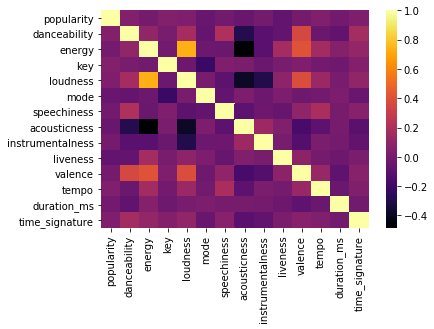

In [19]:
# Use Seaborn to visualize correlations
sns.heatmap(data.corr(), cmap='inferno')
plt.show()

# Data Wrangling & Encoding Assessment
This approach is to cluster the titles - we will validate via a manually generated testset

ISSUE 
the non-numeric columns 'artist_name' & 'track_name'are key attributes, however these cannot be processed by the DBSCAN algorithm
In the case of 'artist_name', of the 9320 entries 2626 are unique - this is a large number of columns to generate for one hot encoding.

To avoid this, the two columns will be dropped.


In [21]:
num_cols = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [22]:
X = data[num_cols]
display(X)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,
2b8fOow8UzyDFAE27YhOZM,100,0.764,0.320,11,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.5750,91.019,189486,4
21jGcNKet2qwijlDFuPiPb,99,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,215280,4
3eekarcy7kvN4yt5ZFzltW,98,0.598,0.427,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4
3ZCTVFBt2Brf31RLEnCkWJ,98,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.2430,120.006,245426,4
2XU0oxnq2qxCpomAAuJY8K,98,0.824,0.588,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.5130,98.027,209438,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5OBtr92M0xsvOGqpnz3LzW,75,0.547,0.817,9,-4.255,1,0.0448,0.0986,0.000000,0.1360,0.5920,142.118,205427,4
5IdAcHb4cwtexqMlOojWhR,75,0.643,0.770,5,-4.524,0,0.2280,0.1300,0.000000,0.2470,0.8630,170.006,181437,4
5HBDBBr5OV90lubqW8ctJF,75,0.958,0.376,8,-7.063,1,0.0523,0.1710,0.000000,0.1270,0.3310,107.964,144427,4


In [23]:
# Using the default parameters of DBSCAN in Scikit-Learn, cluster the observations and print out each observations predictions.
# For example, the output should be something like [0, 0, 1, 1, 2, 2, ...]

# INSERT CODE HERE
from sklearn.cluster import DBSCAN

db = DBSCAN()

pred_dbscan = db.fit_predict(X)
pred_dbscan

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [25]:
db2 = DBSCAN(eps=0.2, min_samples=5)  # Parameters
pred_dbscan2 = db2.fit_predict(X)
print(pred_dbscan2)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1